In [ ]:
# Find correlation between targets variables (y1, y2, y3, y4) : Frailty_Score, Frailty_State, Fried_Score, Fried_State

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics

In [2]:
file_path = 'P:\DATA_OCT_22\Expert_Eye\Dataset\Data\data_v11.xlsx'
dataset = pd.read_excel(file_path)
#dataset = dataset.drop(['Foldername'], axis=1)
target_df = dataset[['Frailty_Score', 'Frailty_State', 'Fried_Score', 'Fried_State']]
target_df.head()

,Frailty_Score,Frailty_State,Fried_Score,Fried_State
0,5,1,NaN,NaN
1,4,1,3.0,1.0
2,9,0,2.0,0.0
3,7,0,2.0,0.0
4,8,0,1.0,0.0


In [7]:
# convert the main dataset as csv file
dataset.to_csv('P:\DATA_OCT_22\Expert_Eye\Dataset\Data\data_v11.csv', index=False)


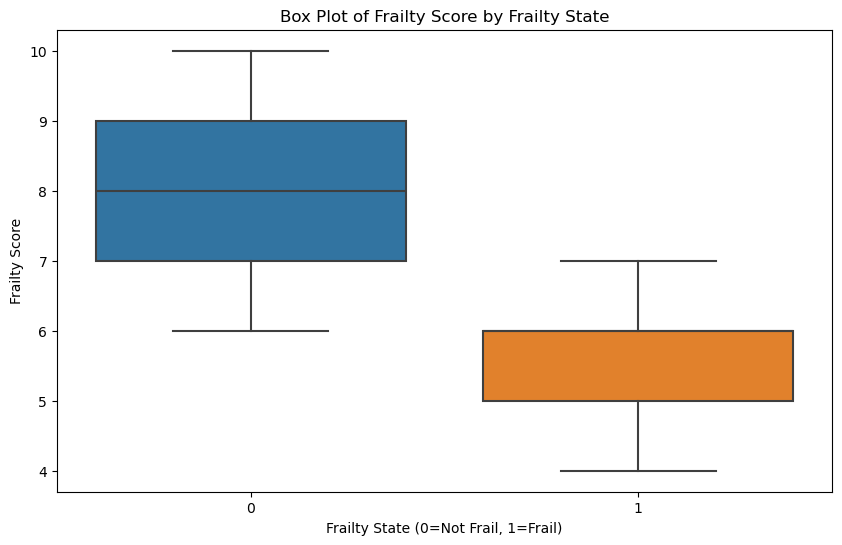

In [3]:
# Box plots for comparing the distribution of the target variables
plt.figure(figsize=(10, 6))
sns.boxplot(x='Frailty_State', y='Frailty_Score', data=target_df)
plt.title('Box Plot of Frailty Score by Frailty State')
plt.xlabel('Frailty State (0=Not Frail, 1=Frail)')
plt.ylabel('Frailty Score')
plt.show()

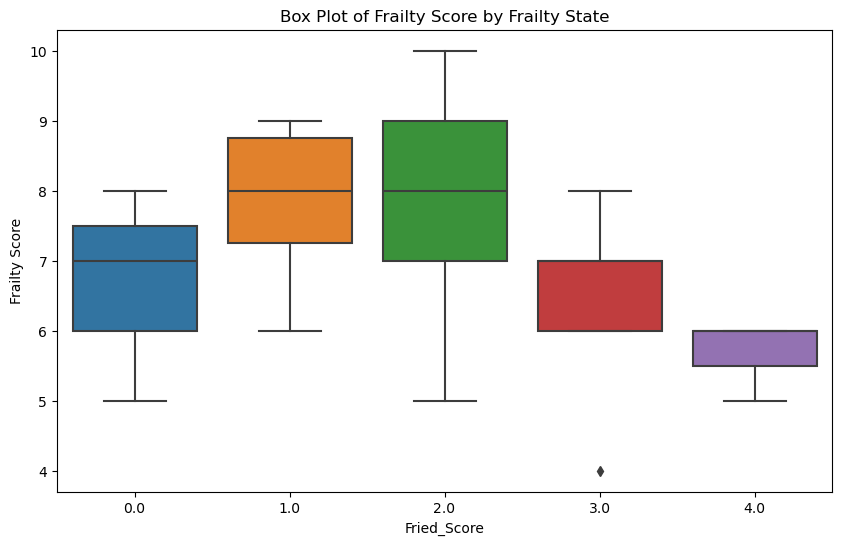

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fried_Score', y='Frailty_Score', data=target_df)
plt.title('Box Plot of Frailty Score by Frailty State')
plt.xlabel('Fried_Score')
plt.ylabel('Frailty Score')
plt.show()

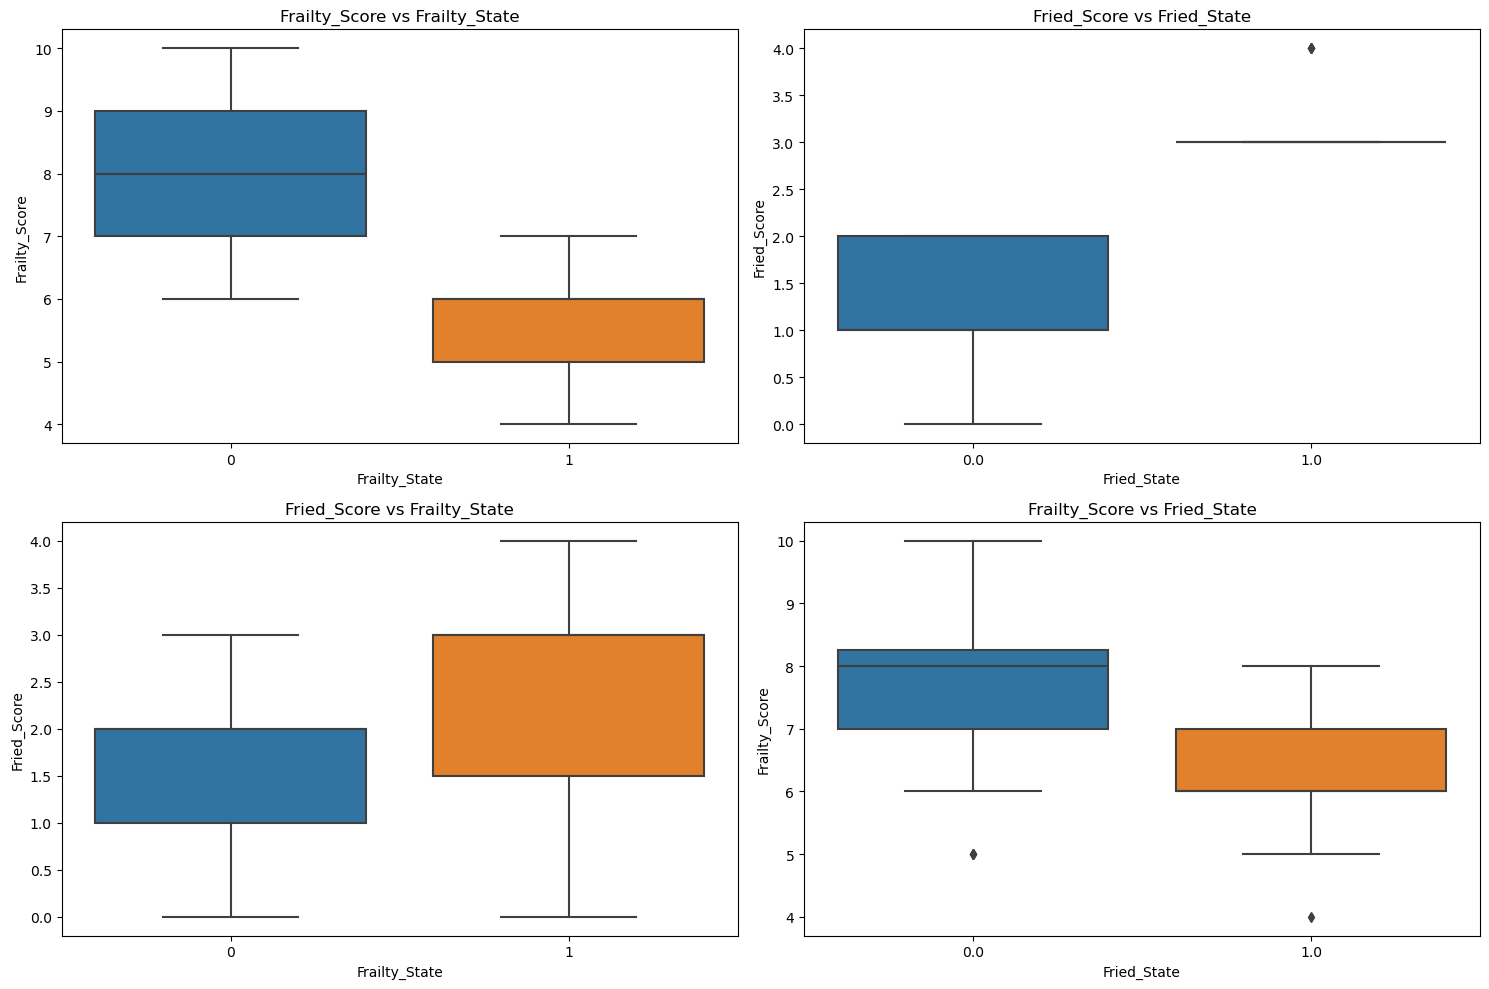

In [6]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='Frailty_State', y='Frailty_Score', data=target_df)
plt.title('Frailty_Score vs Frailty_State')

plt.subplot(2, 2, 2)
sns.boxplot(x='Fried_State', y='Fried_Score', data=target_df)
plt.title('Fried_Score vs Fried_State')

plt.subplot(2, 2, 3)
sns.boxplot(x='Frailty_State', y='Fried_Score', data=target_df)
plt.title('Fried_Score vs Frailty_State')

plt.subplot(2, 2, 4)
sns.boxplot(x='Fried_State', y='Frailty_Score', data=target_df)
plt.title('Frailty_Score vs Fried_State')

plt.tight_layout()
plt.show()


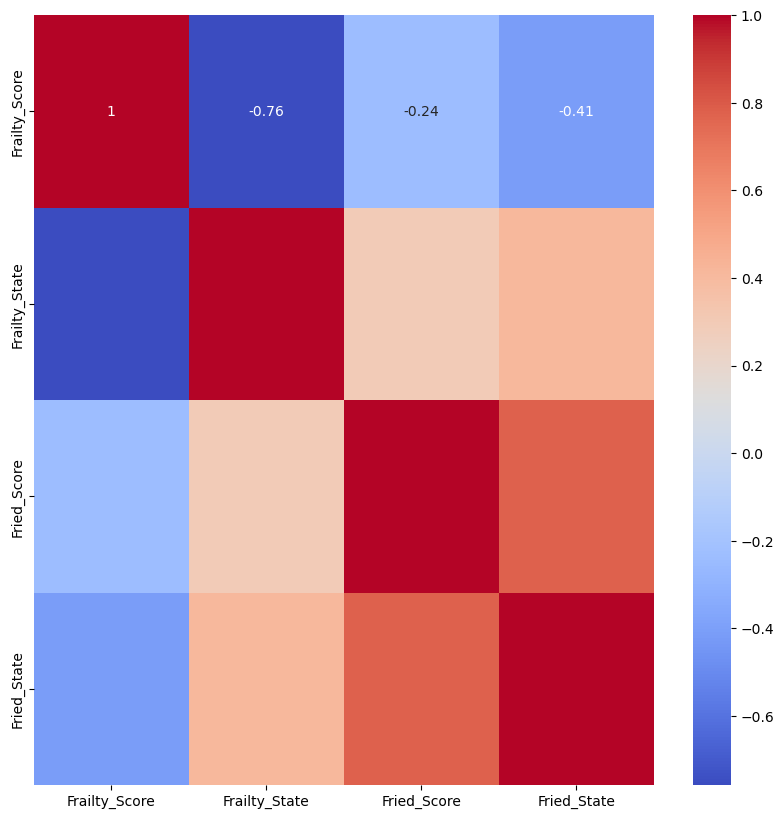

In [5]:
# Correlation between target variables : Frailty_Score, Frailty_State, Fried_Score, Fried_State
corr = target_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [14]:
import os
import time
from collections import defaultdict

def get_acquisition_dates(wii_folder):
    dates = set()
    for filename in os.listdir(wii_folder):
        if filename.endswith('.txt.gz'):
            file_path = os.path.join(wii_folder, filename)
            timestamp = os.path.getmtime(file_path)
            # Convert timestamp to date
            date = time.strftime('%Y-%m-%d', time.gmtime(timestamp))
            dates.add(date)
    return dates

# Initialize a dictionary to hold patient names and their respective acquisition dates.
patient_acquisition_dates = defaultdict(set)

# Navigate to the root folder containing 'Donnees' folders.
base_folder = 'P:\\DATA_OCT_22\\Data_Oct_2022\\Anon_20221010\\Donnees'

# Loop through each patient's folder.
for patient in os.listdir(base_folder):
    patient_folder = os.path.join(base_folder, patient)
    if os.path.isdir(patient_folder):
        for acquisition in os.listdir(patient_folder):
            wii_folder = os.path.join(patient_folder, acquisition, 'Data', 'Raw')
            if os.path.exists(wii_folder):
                patient_acquisition_dates[patient].update(get_acquisition_dates(wii_folder))

# Identify and label patients who have acquisitions on multiple dates.
labelled_patients = {}
for patient, dates in patient_acquisition_dates.items():
    if len(dates) > 1:
        labelled_patients[patient] = [f't_{i}' for i in range(len(dates))]

print("Patients with acquisitions on multiple dates:")
print(labelled_patients)


Patients with acquisitions on multiple dates:
{'LEG001DPA': ['t_0', 't_1'], 'LEG002SPA': ['t_0', 't_1']}


In [15]:
import os
import time
from collections import defaultdict

def get_acquisition_dates(folder_path, file_extension='.txt.gz'):
    dates = set()
    for filename in os.listdir(folder_path):
        if filename.endswith(file_extension):
            file_path = os.path.join(folder_path, filename)
            timestamp = os.path.getmtime(file_path)
            # Convert timestamp to date
            date = time.strftime('%Y-%m-%d', time.gmtime(timestamp))
            dates.add(date)
    return dates

# Initialize dictionaries to hold patient names and their respective acquisition dates.
patient_wii_dates = defaultdict(set)
patient_raw_dates = defaultdict(set)

# Navigate to the root folder containing 'Donnees' folders.
base_folder = 'P:\\DATA_OCT_22\\Data_Oct_2022\\Anon_20221010\\Donnees'

# Loop through each patient's folder.
for patient in os.listdir(base_folder):
    patient_folder = os.path.join(base_folder, patient)
    if os.path.isdir(patient_folder):
        for acquisition in os.listdir(patient_folder):
            wii_folder = os.path.join(patient_folder, acquisition, 'Data', 'WiiAcquisition')
            raw_folder = os.path.join(patient_folder, acquisition, 'Data', 'Raw')
            
            if os.path.exists(wii_folder):
                patient_wii_dates[patient].update(get_acquisition_dates(wii_folder))
                
            if os.path.exists(raw_folder):
                patient_raw_dates[patient].update(get_acquisition_dates(raw_folder))

# Identify and label patients who have acquisitions on multiple dates in either 'WiiAcquisition' or 'Raw'.
labelled_patients = {}
for patient in patient_wii_dates.keys() | patient_raw_dates.keys():
    wii_dates = patient_wii_dates.get(patient, set())
    raw_dates = patient_raw_dates.get(patient, set())
    
    unique_dates = wii_dates | raw_dates
    if len(unique_dates) > 1:
        labelled_patients[patient] = [f't_{i}' for i in range(len(unique_dates))]

print("Patients with acquisitions on multiple dates:")
print(labelled_patients)


Patients with acquisitions on multiple dates:
{'FRA030DHJ': ['t_0', 't_1'], 'LEG002SPA': ['t_0', 't_1', 't_2'], 'FRA025HJM': ['t_0', 't_1'], 'LEG019FMA': ['t_0', 't_1'], 'FRA007TTM': ['t_0', 't_1'], 'LEG010MIC': ['t_0', 't_1'], 'LEG013DJM': ['t_0', 't_1'], 'FRA029SCM': ['t_0', 't_1'], 'FRA012BJN': ['t_0', 't_1'], 'LEG043VJC': ['t_0', 't_1'], 'LEG046BBE': ['t_0', 't_1'], 'FRA018ACV': ['t_0', 't_1'], 'FRA011VJR': ['t_0', 't_1'], 'LEG025HJF': ['t_0', 't_1'], 'LEG037MMN': ['t_0', 't_1'], 'LEG003CMA': ['t_0', 't_1'], 'FRA014GJ': ['t_0', 't_1'], 'FRA040GTG': ['t_0', 't_1'], 'LEG009BMT': ['t_0', 't_1'], 'FRA003BMG': ['t_0', 't_1'], 'LEG040PAB': ['t_0', 't_1'], 'FRA044HMC': ['t_0', 't_1'], 'FRA033SMC': ['t_0', 't_1'], 'LEG012JYV': ['t_0', 't_1'], 'FRA004LHN': ['t_0', 't_1'], 'LEG030KAN': ['t_0', 't_1'], 'LEG011DMA': ['t_0', 't_1'], 'LEG044TJJ': ['t_0', 't_1'], 'FRA006PJA': ['t_0', 't_1'], 'FRA031AMJ': ['t_0', 't_1'], 'FRA023CMC': ['t_0', 't_1'], 'FRA002CTI': ['t_0', 't_1'], 'LEG024GCF': ['t_0'

In [17]:
import os
import time
from collections import defaultdict

def get_acquisition_dates(folder_path, file_extension='.txt.gz'):
    dates = set()
    for filename in os.listdir(folder_path):
        if filename.endswith(file_extension):
            file_path = os.path.join(folder_path, filename)
            timestamp = os.path.getmtime(file_path)
            # Convert timestamp to date
            date = time.strftime('%Y-%m-%d', time.gmtime(timestamp))
            dates.add(date)
    return dates

# Initialize dictionaries to hold patient names and their respective acquisition dates.
patient_wii_dates = defaultdict(set)
patient_raw_dates = defaultdict(set)

# Navigate to the root folder containing 'Donnees' folders.
base_folder = 'P:\\DATA_OCT_22\\Data_Oct_2022\\Anon_20221010\\Donnees'

# Loop through each patient's folder.
for patient in os.listdir(base_folder):
    patient_folder = os.path.join(base_folder, patient)
    if os.path.isdir(patient_folder):
        for acquisition in os.listdir(patient_folder):
            wii_folder = os.path.join(patient_folder, acquisition, 'Data', 'WiiAcquisition')
            raw_folder = os.path.join(patient_folder, acquisition, 'Data', 'Raw')
            
            if os.path.exists(wii_folder):
                patient_wii_dates[patient].update(get_acquisition_dates(wii_folder))
                
            if os.path.exists(raw_folder):
                patient_raw_dates[patient].update(get_acquisition_dates(raw_folder))

# Identify patients whose gait and posture acquisitions are taken on different dates.
different_dates_patients = {}
for patient in patient_wii_dates.keys() | patient_raw_dates.keys():
    wii_dates = patient_wii_dates.get(patient, set())
    raw_dates = patient_raw_dates.get(patient, set())
    
    # Check if there are dates that are exclusive to either 'WiiAcquisition' or 'Raw'.
    different_dates = wii_dates ^ raw_dates
    if different_dates:
        different_dates_patients[patient] = list(different_dates)

print("Patients with gait and posture acquisitions on different dates:")
print(different_dates_patients)


Patients with gait and posture acquisitions on different dates:
{'FRA030DHJ': ['2022-05-06', '2022-04-23'], 'LEG002SPA': ['2021-10-06', '2021-12-11', '2022-05-31'], 'FRA025HJM': ['2022-06-10', '2022-05-06'], 'FRA047BH': ['2022-07-20'], 'LEG026BCA': ['2022-04-01'], 'LEG019FMA': ['2022-05-17', '2022-03-18'], 'FRA007TTM': ['2022-04-29', '2022-04-08'], 'FRA008TJL': ['2022-04-29'], 'DUP002BME': ['2022-08-22'], 'LEG010MIC': ['2022-03-03', '2022-06-05'], 'LEG013DJM': ['2022-03-10', '2022-03-22'], 'FRA029SCM': ['2022-06-24', '2022-06-18'], 'LEG018BJC': ['2022-03-18'], 'FRA012BJN': ['2022-04-12', '2022-04-22'], 'LEG043VJC': ['2022-06-14', '2022-06-10'], 'LEG046BBE': ['2022-06-17', '2022-06-21'], 'FRA018ACV': ['2022-05-13', '2022-04-30'], 'FRA009RMI': ['2022-04-08'], 'FRA011VJR': ['2022-04-29', '2022-04-12'], 'LEG025HJF': ['2022-04-01', '2022-04-05'], 'LEG037MMN': ['2022-05-06', '2022-05-24'], 'LEG003CMA': ['2021-12-21', '2021-12-15'], 'FRA014GJ': ['2022-05-13', '2022-04-29'], 'FRA040GTG': ['202

In [18]:
len(different_dates_patients)

99